In [1]:
import sys
path_to_add = '../python_modules'
if path_to_add not in sys.path:
    sys.path.append(path_to_add)

In [2]:
import statistics
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt

In [3]:
import inferostatics
from dirichlet import param_shape, x_shape
import seeds

In [4]:
task = 'carl'
data_seeds_list = seeds.get_testdata_seeds(task)

x_test = []
param_0_test = []
param_1_test = []
y_test = []
true_llr_test = []

for data_seed in data_seeds_list:
    data = np.load(f'data/Trivariate_Dirichlet_{task}_seed={data_seed}.npz')
    x_test.append(data['x'])
    param_0_test.append(data['param_0'])
    param_1_test.append(data['param_1'])
    y_test.append(data['y'])
    true_llr_test.append(data['true_llr'])

del(data)

cce_loss = keras.losses.CategoricalCrossentropy(from_logits=True, reduction='none')
mse_loss = keras.losses.MeanSquaredError(reduction='none')

test_losses_dict = dict()
test_errors_dict = dict()

**Training task: KSE**  
**Network type: Inferostatic Network**

In [5]:
training_task = 'kse'
network_type = 'inferostatic'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    potential_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    inferostatics_object = inferostatics.InferostaticsSuite(x_shape=x_shape,
                                                            param_shape=param_shape,
                                                            potential_model=potential_model,
                                                            expand_fn_args=False)
    
    llr_model = inferostatics_object.make_llr_model()
    tmp = cce_loss(
        keras.utils.to_categorical(y_test[0]),
        llr_model.predict([x_test[0], param_0_test[0], param_1_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    llr_model = inferostatics_object.make_llr_model(output_mode='logit', output_for='0')
    tmp = mse_loss(
        true_llr_test[1].reshape(-1, 1),
        llr_model.predict([x_test[1], param_0_test[1], param_1_test[1]]),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 986us/step
test_losses = [(0.43054014, 0.0014225815892795635), (0.42453682, 0.0015107818381861976), (0.4304166, 0.0014697017847851615), (0.43128535, 0.001579738847076228), (0.43989867, 0.0013828590151950323)]
median=(0.43054014, 0.0014225815892795635)

test_errors = [(4.2845263, 0.10087494921988811), (3.6667771, 0.0975262177608367), (3.5356543, 0.09257239009166153), (3.4831815, 0.09424983493561578), (5.4472904, 0.1141504621129861)]
median=(3.6667771, 0.0975262177608367)


**Training task: KSE**  
**Network type: Direct Network**

In [6]:
training_task = 'kse'
network_type = 'direct'
n_reps = 5

# EMPTY

**Training task: KLRE**  
**Network type: Inferostatic Network**

In [7]:
training_task = 'klre'
network_type = 'inferostatic'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    potential_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    inferostatics_object = inferostatics.InferostaticsSuite(x_shape=x_shape,
                                                            param_shape=param_shape,
                                                            potential_model=potential_model,
                                                            expand_fn_args=False)
    
    llr_model = inferostatics_object.make_llr_model()
    tmp = cce_loss(
        keras.utils.to_categorical(y_test[0]),
        llr_model.predict([x_test[0], param_0_test[0], param_1_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    llr_model = inferostatics_object.make_llr_model(output_mode='logit', output_for='0')
    tmp = mse_loss(
        true_llr_test[1].reshape(-1, 1),
        llr_model.predict([x_test[1], param_0_test[1], param_1_test[1]]),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 960us/step
test_losses = [(0.4870257, 0.0017484976335330124), (0.47211805, 0.0013673796608312035), (0.44969934, 0.0017177575690718288), (0.49556977, 0.001386947568734877), (0.44849753, 0.0014954459220006332)]
median=(0.47211805, 0.0013673796608312035)

test_errors = [(7.0734186, 0.1302148866694726), (7.9797287, 0.14050514836367148), (5.5655227, 0.11795498091782064), (9.141085, 0.14819586543972924), (5.293112, 0.11080295506182695)]
median=(7.0734186, 0.1302148866694726)


**Training task: KLRE**  
**Network type: Direct Network**

In [8]:
training_task = 'klre'
network_type = 'direct'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    llr_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    tmp = cce_loss(
        keras.utils.to_categorical(y_test[0]),
        llr_model.predict([x_test[0], param_0_test[0], param_1_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    output = llr_model.predict([x_test[1], param_0_test[1], param_1_test[1]])
    tmp = mse_loss(
        true_llr_test[1].reshape(-1, 1),
        (output[:,0]-output[:,1]).reshape(-1, 1),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 981us/step
test_losses = [(0.7212281, 0.001314420249762476), (0.6955733, 0.0014235883895807452), (0.67617875, 0.0006949457691941873), (0.6898602, 0.0008867154981706913), (0.68659896, 0.0009174814795169095)]
median=(0.6898602, 0.0008867154981706913)

test_errors = [(16.952818, 0.1983866128120351), (16.010368, 0.19172036927940178), (16.72067, 0.19899230266691278), (16.893017, 0.19982750567014543), (16.605677, 0.19730376577313657)]
median=(16.72067, 0.19899230266691278)


**Training task: CARL**  
**Network type: Inferostatic Network**

In [9]:
training_task = 'carl'
network_type = 'inferostatic'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    potential_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    inferostatics_object = inferostatics.InferostaticsSuite(x_shape=x_shape,
                                                            param_shape=param_shape,
                                                            potential_model=potential_model,
                                                            expand_fn_args=False)
    
    llr_model = inferostatics_object.make_llr_model()
    tmp = cce_loss(
        keras.utils.to_categorical(y_test[0]),
        llr_model.predict([x_test[0], param_0_test[0], param_1_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    llr_model = inferostatics_object.make_llr_model(output_mode='logit', output_for='0')
    tmp = mse_loss(
        true_llr_test[1].reshape(-1, 1),
        llr_model.predict([x_test[1], param_0_test[1], param_1_test[1]]),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 959us/step
test_losses = [(0.4260568, 0.0015730967735363348), (0.42298493, 0.0016984865273058244), (0.4264141, 0.0017079781387944707), (0.42066363, 0.0016315165424305945), (0.42417908, 0.0016409566971220446)]
median=(0.42417908, 0.0016409566971220446)

test_errors = [(3.272429, 0.09222275227541428), (2.918336, 0.09050633748371689), (3.436064, 0.09690536454910618), (3.0509632, 0.0910296602736851), (3.3158443, 0.0946423994068836)]
median=(3.272429, 0.09222275227541428)


**Training task: CARL**  
**Network type: Direct Network**

In [10]:
training_task = 'carl'
network_type = 'direct'
n_reps = 5

network_seeds_list = seeds.get_network_seeds(training_task, network_type, n_reps)
test_losses = []
test_errors = []
for network_seed in network_seeds_list:
    llr_model = keras.models.load_model(f'nn_models/Trivariate_Dirichlet_{training_task}_{network_type}_seed={network_seed}.tf', compile=False)
    
    tmp = cce_loss(
        keras.utils.to_categorical(y_test[0]),
        llr_model.predict([x_test[0], param_0_test[0], param_1_test[0]]),
    ).numpy()
    test_losses.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))
    
    output = llr_model.predict([x_test[1], param_0_test[1], param_1_test[1]])
    tmp = mse_loss(
        true_llr_test[1].reshape(-1, 1),
        (output[:,0]-output[:,1]).reshape(-1, 1),
    ).numpy()
    test_errors.append((np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5))

test_losses_dict[(training_task, network_type)] = test_losses
test_errors_dict[(training_task, network_type)] = test_errors

print(f'{test_losses = }')
print(f'median={statistics.median(test_losses)}\n')
print(f'{test_errors = }')
print(f'median={statistics.median(test_errors)}')

3125/3125 [==============================] - 3s 1ms/step
test_losses = [(0.44226322, 0.0015861448413542604), (0.44445032, 0.0017609051301961), (0.44222215, 0.0016303023128059176), (0.45054492, 0.001711394643944563), (0.43440327, 0.0015295766689700928)]
median=(0.44226322, 0.0015861448413542604)

test_errors = [(6.7350745, 0.13534357546773318), (5.4328256, 0.12089973618278578), (5.550648, 0.12219104620479805), (5.824778, 0.126071550677744), (6.0606394, 0.12893526582231346)]
median=(5.824778, 0.126071550677744)


**Ideal**

In [11]:
tmp = cce_loss(
    keras.utils.to_categorical(y_test[0]),
    np.stack([true_llr_test[0]/2, -true_llr_test[0]/2], axis=-1),
).numpy()
print(np.mean(tmp), np.std(tmp, ddof=1)/tmp.size**.5)

0.4145570566369177 0.0016162470578131834


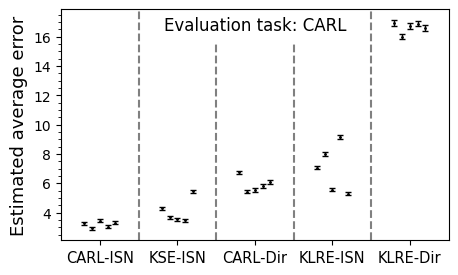

In [12]:
fig, ax = plt.subplots(figsize=(5, 3))

x_labels = ['KSE-ISN', 'KLRE-ISN', 'KLRE-Dir', 'CARL-ISN', 'CARL-Dir']
x_keys = [('kse', 'inferostatic'), ('klre', 'inferostatic'), ('klre', 'direct'), ('carl', 'inferostatic'), ('carl', 'direct')]

sorted_idx = sorted(list(range(len(x_keys))), key=lambda i: statistics.median(test_errors_dict[x_keys[i]]))

x_labels = [x_labels[i] for i in sorted_idx]
x_keys = [x_keys[i] for i in sorted_idx]

for i in range(len(x_keys)):
    tmp = test_errors_dict[x_keys[i]]
    y = [_[0] for _ in tmp]
    yerr = [_[1] for _ in tmp]
    x = [i-0.2+0.1*j for j in range(len(y))]
    ax.errorbar(x, y, yerr, capsize=2, linewidth=0, elinewidth=1, fmt='.', markersize=2, color='black')

for i in range(len(x_keys)-1):
    ymax = 0.85
    if i in [0, len(x_keys)-2]:
        ymax = 1
    ax.axvline(x=i+0.5, linestyle='dashed', color='gray', ymax=ymax)

ax.set_xlim(-0.5, len(x_keys)-0.5)
ax.set_xticks(list(range(len(x_keys))))
ax.set_xticklabels(x_labels, fontsize=10.5)
ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.set_ylabel('Estimated average error', fontsize=13)
ax.text(0.5, 0.93, "Evaluation task: CARL", ha='center', va='center', transform=ax.transAxes, fontsize=12)

fig.savefig('plots/carl_errors.pdf', bbox_inches='tight')